# Planets dataset - EDA

In [1]:
# Planets EDA - same Titanic steps (with comments)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# 1. Load dataset
df = sns.load_dataset('planets')   # seaborn built-in
df.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:

# 2. Basic Information & Overview
print("Shape of Dataset : ", df.shape)
print("\nData Info :")
print(df.info())


Shape of Dataset :  (1035, 6)

Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


In [4]:

# 3. Summary Statistics
display(df.describe(include='all'))


,method,number,orbital_period,mass,distance,year
count,1035,1035.000000,992.000000,513.000000,808.000000,1035.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,NaN,1.240976,26014.728304,3.818617,733.116493,3.972567
min,NaN,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,NaN,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,NaN,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,NaN,2.000000,526.005000,3.040000,178.500000,2012.000000


In [5]:

# 4. Missing values Analysis
missing = pd.DataFrame({
    'missing_count' : df.isnull().sum(),
    'missing_percent' : (df.isnull().sum()/len(df))*100
}).sort_values(by='missing_percent', ascending=False)
print(missing)


                missing_count  missing_percent
mass                      522        50.434783
distance                  227        21.932367
orbital_period             43         4.154589
method                      0         0.000000
number                      0         0.000000
year                        0         0.000000


In [6]:

# 4a. Handling missing values
# Numeric fills: distance, mass, radius (mass and radius have many NaNs)
for c in ['distance','mass','radius','orbital_period']:
    if c in df.columns and df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].median())


In [7]:

# Categorical fills
for c in ['method','name','orbital_period']:
    if c in df.columns and df[c].isnull().sum() > 0 and df[c].dtype == 'object':
        df[c] = df[c].fillna(df[c].mode()[0])

print('Missing values after cleaning :', df.isnull().sum().sum())


Missing values after cleaning : 0


In [8]:

# Duplication & Data type check
print("Duplicate Rows : ", df.duplicated().sum())
if 'method' in df.columns:
    df['method'] = df['method'].astype('category')
df.info()


Duplicate Rows :  4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  1035 non-null   float64 
 3   mass            1035 non-null   float64 
 4   distance        1035 non-null   float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 41.9 KB


,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,1.785507,1921.365579,1.943088,218.270271,2009.070531
std,1.240976,25471.074254,2.774105,653.407624,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.747860,1.260000,38.010000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,487.100000,1.260000,130.720000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


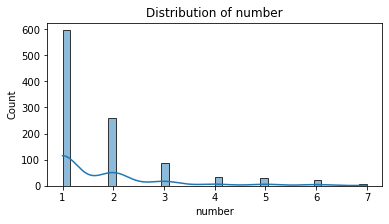

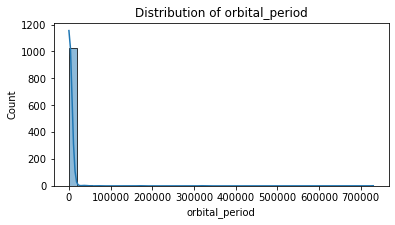

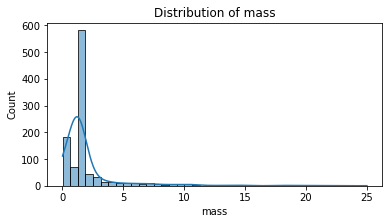

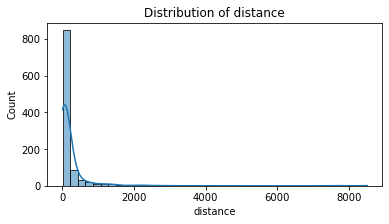

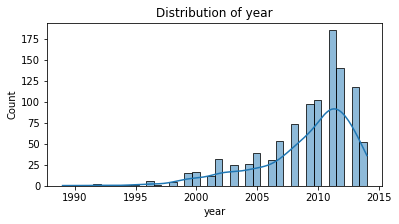

In [9]:

# Univariate Analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
display(df[num_cols].describe())

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


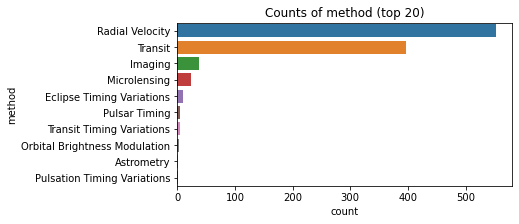

In [10]:

# Univariate - Categorical
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:20])
    plt.title(f"Counts of {col} (top 20)")
    plt.show()


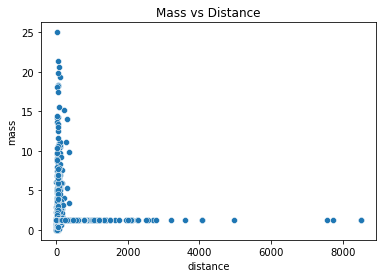

In [11]:

# Bivariate Analysis
# mass vs distance (if both present)
if set(['mass','distance']).issubset(df.columns):
    sns.scatterplot(x='distance', y='mass', data=df)
    plt.title("Mass vs Distance")
    plt.show()


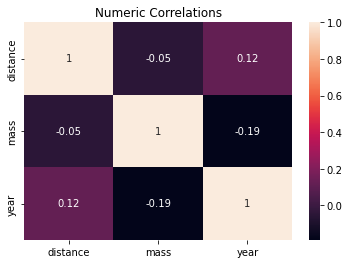

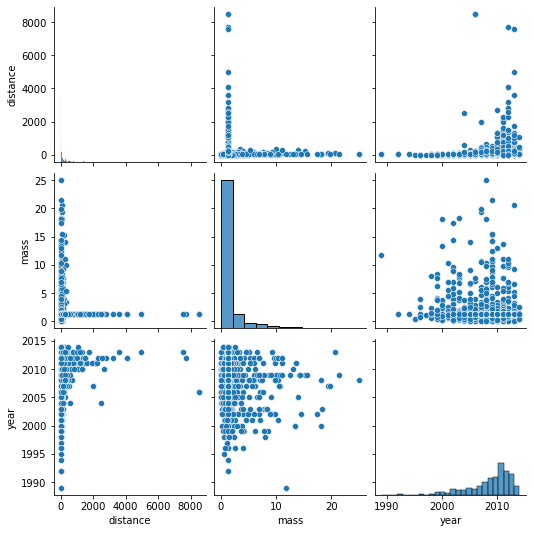

In [12]:

# Correlation and multivariate analysis
corr_cols = [c for c in ['distance','mass','radius','year'] if c in df.columns]
if len(corr_cols) >= 2:
    sns.heatmap(df[corr_cols].corr(), annot=True)
    plt.title("Numeric Correlations")
    plt.show()
    sns.pairplot(df[corr_cols])
    plt.show()


Number of outliers in distance :  164


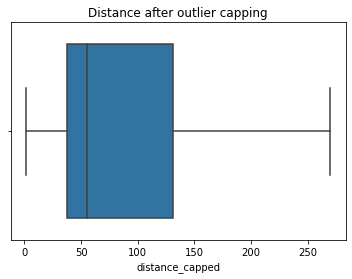

In [13]:

# Outlier detection using IQR on 'distance'
if 'distance' in df.columns:
    Q1 = df['distance'].quantile(0.25)
    Q3 = df['distance'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['distance'] < lower) | (df['distance'] > upper)]
    print("Number of outliers in distance : ",len(outliers))
    df['distance_capped'] = df['distance'].clip(lower, upper)
    sns.boxplot(x=df['distance_capped'])
    plt.title("Distance after outlier capping")
    plt.show()


In [14]:

# Feature Engineering
# Example: mass_to_radius ratio if both exist
if set(['mass','radius']).issubset(df.columns):
    df['mass_radius_ratio'] = df['mass'] / df['radius'].replace(0, np.nan)
    df['mass_radius_ratio'] = df['mass_radius_ratio'].fillna(df['mass_radius_ratio'].median())
    sns.histplot(df['mass_radius_ratio'], bins=40, kde=True)
    plt.title("Mass to Radius ratio")
    plt.show()


In [15]:

# Export the Cleaned data
df.to_csv("planets_cleaned.csv", index=False)
print("\n Cleaned planets data saved as planets_cleaned.csv")



 Cleaned planets data saved as planets_cleaned.csv
